For normal and log cosh with Euclidean distance

In [113]:
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
import os.path
import os

In [114]:
Model = "poisson"
TrainPattern = "parallel"

# Setting Number 1, 2, or 3
Index = 3
batchsize = 32
# number of transmission iterations
kNum = 50
# number of iterations
niter = 100

# number of local updates
QList = [5, 10, 25]
# factor of the proximal term
muList = [0, 0.1]

In [115]:
n = 2000
sig = 0.1
randomBeta = "True"
Xdist= "uniform"


In [116]:
# number of eta0 values
numEta0s = 20 
minval = 10**(-2)
maxval = 5


In [117]:

eta0List = math.e**(np.linspace(math.log(minval), math.log(maxval), num=numEta0s))

def FindBestSetting(eta0List, mu, Index, sig, Q):
    values_array = []
    for eta0 in eta0List:
        fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) +  "_sig_" + str(sig) + "_Xdist_" + str(Xdist) +  "_randomBeta_" + randomBeta + "_batchsize_" + str(batchsize) +  "_TrainPattern_" + TrainPattern + "_mu_" + str(mu) + "_Q_" + str(Q) + "_eta0_" + str(eta0)
        path = "./VFL/" + Model + "_results/Setting" + str(Index) + "/data/" + fname +  "_dic.p"
        # the result of some tuning parameter settings are missing due to numerical issues (divering resulted by large step size). Ignore them
        if os.path.isfile(path):
            infile = open("./VFL/" + Model + "_results/Setting" + str(Index) + "/data/" + fname +  "_dic.p", 'rb')
        else:
            break
        new_dict = pickle.load(infile)
        infile.close()
        value=new_dict["EuDis"]
        LastValueMean = np.mean(value[:, (value.shape[1]-1)])
        values_array.append(LastValueMean)
    return min(values_array), values_array.index(min(values_array))

In [118]:
#FBCD
# collect the results without the proximal term 
mu = 0

BestVal1 = []
IndList1 = []
for Q in QList:
    Bv, ind, = FindBestSetting(eta0List, mu, Index, sig, Q)
    BestVal1.append(Bv)
    IndList1.append(ind)

In [119]:
# collect the results with the proximal term
mu = 0.1

BestVal2 = []
IndList2 = []
for Q in [5, 10, 25]:
    Bv, ind= FindBestSetting(eta0List, mu, Index, sig, Q)
    BestVal2.append(Bv)
    IndList2.append(ind)


In [120]:
if min(BestVal1) < min(BestVal2):
    bestMuInd = 0
    bestQ = QList[BestVal1.index(min(BestVal1))]
    bestEta0 = eta0List[IndList1[BestVal1.index(min(BestVal1))]]
    bestVal = min(BestVal1)
elif min(BestVal1) > min(BestVal2):
    bestMuInd = 1
    bestQ = QList[BestVal2.index(min(BestVal2))]
    bestEta0 = eta0List[IndList2[BestVal2.index(min(BestVal2))]]
    bestVal = min(BestVal2)
print("bestVal=" + str(bestVal) + ", mu=" + str(muList[bestMuInd]) + ", Q=" +str(bestQ) + ", eta0=" + str(bestEta0)) 

bestVal=0.1597600671758908, mu=0, Q=5, eta0=0.010000000000000007


In [121]:
# for FSGD

Bv, ind = FindBestSetting(eta0List, 0, Index, sig, 1)
eta0FSGD = eta0List[ind]
print("bestVal=" + str(Bv) + ", eta0=" + str(eta0FSGD))

bestVal=0.16242494259267212, eta0=0.0711715324658232


In [122]:
nrep = niter + 1

In [123]:
# read the FedBCD data 
mu = muList[bestMuInd]
eta0 = bestEta0
Q = bestQ
fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) +  "_sig_" + str(sig) + "_Xdist_" + str(Xdist) +  "_randomBeta_" + randomBeta + "_batchsize_" + str(batchsize) +  "_TrainPattern_" + TrainPattern + "_mu_" + str(mu) + "_Q_" + str(Q) + "_eta0_" + str(eta0)
infile = open("./VFL/" + Model + "_results/Setting" + str(Index) + "/data/" + fname +  "_dic.p", 'rb')
new_dict = pickle.load(infile)
infile.close()
FedBCD_EuDis=new_dict["EuDis"]

In [124]:
# read the FedSGD data (mu = 0, Q=1)
mu = 0
eta0 = eta0FSGD
Q = 1
fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) +  "_sig_" + str(sig) + "_Xdist_" + str(Xdist) +  "_randomBeta_" + randomBeta + "_batchsize_" + str(batchsize) +  "_TrainPattern_" + TrainPattern + "_mu_" + str(mu) + "_Q_" + str(Q) + "_eta0_" + str(eta0)
infile = open("./VFL/" + Model + "_results/Setting" + str(Index) + "/data/" + fname +  "_dic.p", 'rb')
new_dict = pickle.load(infile)
infile.close()
FedSGD_EuDis=new_dict["EuDis"]

In [125]:
# read the assisted learning data
fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) +  "_sig_" + str(sig) + "_Xdist_" + str(Xdist) +  "_randomBeta_" + randomBeta
infile = open("./AE_AL/" + Model + "_results/results/data/" + fname +  "_dic.p", 'rb')
new_dict = pickle.load(infile)
infile.close()
AEAL_EuDis = new_dict["EuDis"]


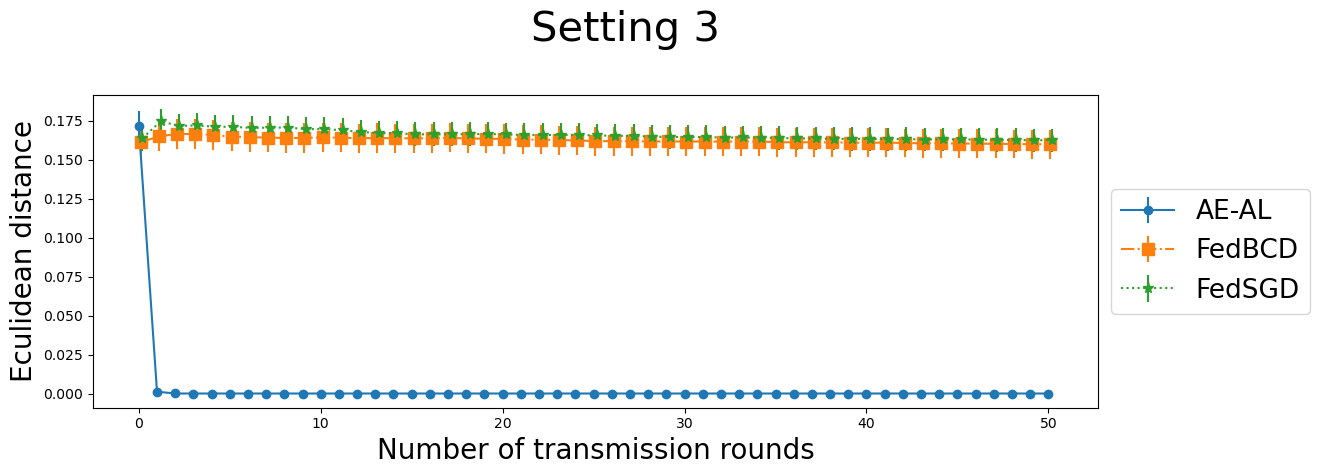

In [126]:
# number of plots
NumPlots = 1
niterList = np.array(range(kNum + 1))
#==========================Setting 1================================
fit, axes = plt.subplots(1,1, figsize = (9, 8))
fit.set_size_inches(14, 5)   
#fit.suptitle( 'Setting ' + str(Index) + ', AR(1) ' + r'$\rho=' + str(sig) + '$', fontsize=20)  
fit.suptitle( 'Setting ' + str(Index), fontsize=30)  
#nList = ['n=300', 'n=2000']
for i in range(NumPlots):
    #axe = axes[i]
    if NumPlots == 1:
        axe = axes
    else:
        axe = axes[i]
    AEAL_EuDis_mean = np.mean(AEAL_EuDis, axis = 0)
    AEAL_EuDis_ste = np.std(AEAL_EuDis, axis = 0)/math.sqrt(nrep)


    FedBCD_EuDis_mean = np.mean(FedBCD_EuDis, axis = 0)
    FedBCD_EuDis_ste = np.std(FedBCD_EuDis, axis = 0)/math.sqrt(nrep)

    FedSGD_EuDis_mean = np.mean(FedSGD_EuDis, axis = 0)
    FedSGD_EuDis_ste = np.std(FedSGD_EuDis, axis = 0)/math.sqrt(nrep)
    
    
    axe.errorbar((niterList), AEAL_EuDis_mean , AEAL_EuDis_ste, marker = 'o')
    axe.errorbar((niterList + 0.1), FedBCD_EuDis_mean , FedBCD_EuDis_ste, marker = "s", linestyle = '-.', markersize=8)
    axe.errorbar((niterList + 0.2),  FedSGD_EuDis_mean , FedSGD_EuDis_ste, marker = "*", linestyle = 'dotted', markersize=8)
    axe.set_xlabel("Number of transmission rounds", fontsize=20)
    axe.set_ylabel("Eculidean distance", fontsize=20)
    #axe.set_title(nList[i], fontsize=20)
    
    if i==(NumPlots - 1):
        axe.legend(['AE-AL', 'FedBCD', 'FedSGD'], prop={'size': 19}, loc='center left', bbox_to_anchor=(1, 0.5))
    elif i<(NumPlots - 1):
        axe.legend('',frameon=False)
plt.tight_layout(rect=[0.05, 0.04, 1, 0.95])

#===========================create folder to store output results=====================
results_path_data = "./Result_Figure" + Model
# Check whether the specified path exists or not
isExist = os.path.exists(results_path_data)

if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(results_path_data)

fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) +  "_sig_" + str(sig) + "_Xdist_" + str(Xdist) +  "_randomBeta_" + randomBeta

plt.savefig('Result_Figure/' + Model+'/' + fname + 'Setting1.pdf')